<h3>Import des modules et téléchargement de la structure</h3>

In [33]:
from numpy import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import matplotlib.pyplot as plt

with MPRester("VmJsz9RpLnefKgXu") as m: 
    bs = m.get_bandstructure_by_material_id("mp-567636")
    

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

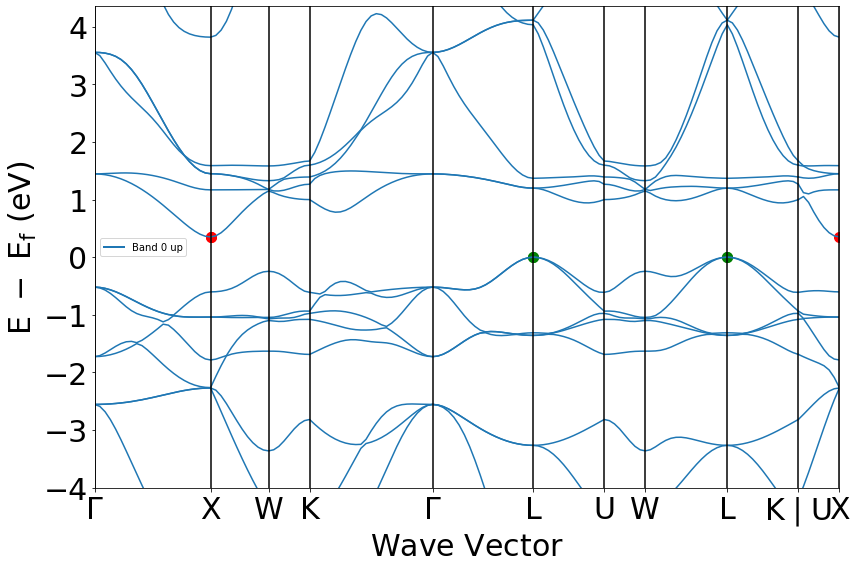

In [9]:
bsplot = plotter.BSPlotter(bs)
bsplot.get_plot(vbm_cbm_marker=True)

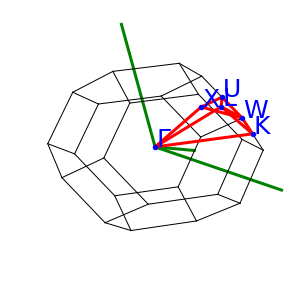

In [10]:
bsplot.plot_brillouin()

<h3>Détermination de la bande interdite</h3>

In [18]:
gap = bs.get_band_gap()
print("La bande interdite a une énergie de {:.5f} eV".format(gap["energy"]))
if(gap["direct"] == True):
    print("La bande interdite est directe")
else:
    print("La bande interdite est indirecte")

print("Le vecteur de transition est {}".format(gap["transition"]))

La bande interdite a une énergie de 0.35080 eV
La bande interdite est indirecte
Le vecteur de transition est L-X


<h3>Analyse de la bande interdite</h3>

Ici la bande interdite a une énergie faible, c'est-à-dire inférieure à 1 eV. De plus la valeur obtenue est confirmée par le site Materials Project.
Dans mon cas, la bande interdite est dite indirecte car les extremums qui définissent la bande interdite ne se trouvent pas à un même endroit dans la zone de Brillouin. On observe que la transition se fait du point L au point X.

<h3>Dispersion</h3>

In [62]:
bsdata = bsplot.bs_plot_data()

e0 = bsdata["zero_energy"]
vbm = bs.get_vbm()
cbm = bs.get_cbm()
kpoint_vbm = vbm["kpoint"].cart_coords
kpoint_cbm = cbm["kpoint"].cart_coords

print("Energie 0 = {:2f}\n".format(e0))
print("Dernière bande de valence")
print("Energie du maximum de la bande de valence = {:2f} eV".format(vbm["energy"]))
print("Vecteur k en coordonnées cartésiennes = {}".format(kpoint_vbm))
print(vbm["band_index"],"\n")
print("Première bande de conduction")
print("Energie minimum de la bande de conduction = {:2f} eV".format(cbm["energy"]))
print("Vecteur k en coordonnées cartésiennes = {}".format(kpoint_cbm))
print(cbm["band_index"],"\n")

Energie 0 = 7.485900

Dernière bande de valence
Energie du maximum de la bande de valence = 7.485900 eV
Vecteur k en coordonnées cartésiennes = [0.54265839 0.54265839 0.54265839]
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]}) 

Première bande de conduction
Energie minimum de la bande de conduction = 7.836700 eV
Vecteur k en coordonnées cartésiennes = [0.         1.08531677 0.        ]
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]}) 



Les bandes de valences 13 et 14 sont les bandes qui présentent la plus haute énergie parmis les bandes de valence. On peut observer ces maximums aux points verts sur la figure 1.
Tandis que la bande de conduction 15 est la bande qui présente la plus basse énergie parmis les bande de consuction. On peut observer ces minimums aux points rouges sur la figure 1.

In [63]:
x = bsdata["ticks"]["distance"]
x = unique(x)
y = bsdata["energy"]

dx = zeros(10)
dy_vbm = zeros(10)
dy_cbm = zeros(10)
m_vbm = zeros(10)
m_cbm = zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dy_vbm[i] =y["1"][i][14][-1] - y["1"][i][14][0]
    dy_cbm[i] =y["1"][i][15][-1] - y["1"][i][15][0]

for i in range (10):
    m_vbm[i] = dyv[i]/dx[i] 
    m_cbm[i] = dyc[i]/dx[i]

print("En valeur absolue:")
max_vbm = max(abs(m_vbm))
print("La plus grande dispersion pour la bande de valence: {:2f}".format(max_vbm))
max_cbm = max(abs(m_cbm))
print("La plus grande dispersion pour la bande de conduction: {:2f}".format(max_cbm))
min_vbm = min(abs(m_vbm))
print("La plus faible dispersion pour la bande de valence: {:2f}".format(min_vbm))
min_cbm = min(abs(m_cbm))
print("La plus faible dispersion pour la bande de conduction: {:2f}".format(min_cbm))

En valeur absolue:
La plus grande dispersion pour la bande de valence: 0.952003
La plus grande dispersion pour la bande de conduction: 1.688743
La plus faible dispersion pour la bande de valence: 0.019285
La plus faible dispersion pour la bande de conduction: 0.063849


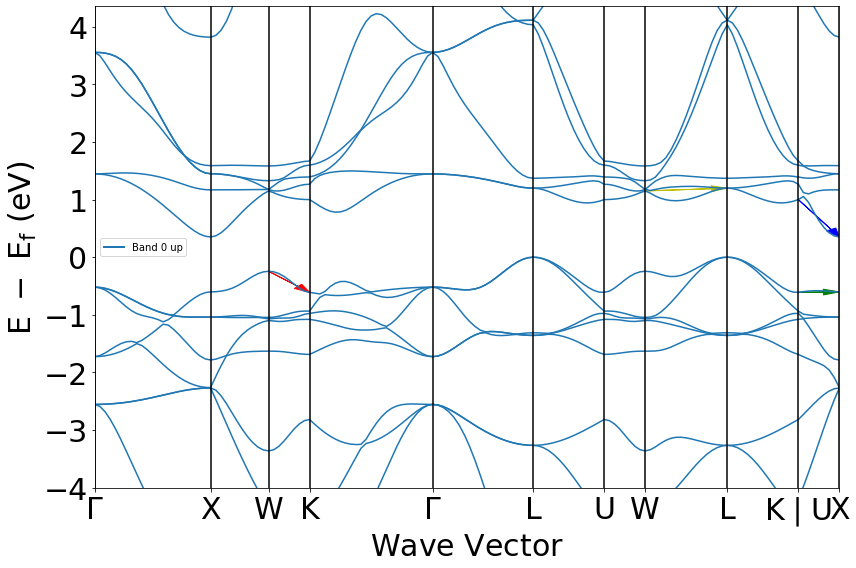

In [64]:
bsplot.get_plot()
plt.arrow(x[2], (y["1"][2][14])[0], dx[2], dy_vbm[2], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[9], (y["1"][9][14])[0], dx[9], dy_vbm[9], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[9], (y["1"][9][15])[0], dx[9], dy_cbm[9], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[7], (y["1"][7][15])[0], dx[7], dy_cbm[7], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

<h4>Dispersion sur la dernière bande de valence</h4>
La plus grande dispersion sur la bande de valence a lieu sur W-K. Elle vaut 0.952 et est représentée en rouge.<br>
La plus faible dispersion sur la bande de valence a lieu sur U-X. Elle vaut 0.019 et est représentée en vert.

<h4>Dispersion sur la première bande de conduction</h4>
La plus grande dispersion sur la bande de conduction a lieu sur U-X. Elle vaut 1.689 et est représentée en bleu.<br>
La plus faible dispersion sur la bande de conduction a lieu sur W-L. Elle vaut 0.064 et est représentée en jaune.

<h3>Masses effectives</h3>

In [69]:
norm_k_vbm = linalg.norm(kpoint_vbm)
norm_k_cbm = linalg.norm(kpoint_cbm)

hbar = 6.5821e-16
me = 9.11e-31

m_vbm = (hbar**2 * norm_k_vbm**2)/(2*abs(vbm["energy"]))
m_cbm = (hbar**2 * norm_k_cbm**2)/(2 * abs(vbm["energy"]))


print("Pour la bande de valence, la valeur de la norme est {:2f}.".format(norm_k_vbm))
print("Pour la bande de conduction, la valeur de la norme est {:2f}.".format(norm_k_cbm))

print("La masse effective au sommet de la dernière bande de valence est {:2e} kg.".format(m_vbm))
print("La masse effective à la base de la première bande de conduction est {:2e} kg.".format(m_cbm))

Pour la bande de valence, la valeur de la norme est 0.939912.
Pour la bande de conduction, la valeur de la norme est 1.085317.
La masse effective au sommet de la dernière bande de valence est 2.556402e-32 kg.
La masse effective à la base de la première bande de conduction est 3.408537e-32 kg.
